# Project: Investigating the IMDB Movie Dataset
#### *"What it takes to make a great movie"*
#### Analysis by Patrick Flynn

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this analysis, we will assume we are a data analyst working for screenwriter looking to make the next big blockbuster film! We are armed with an IMDB data set and our goal is to determine what genre(s) of movie we should have our screenwriter write and what features will best determine if the movie will be profitable.

This analysis will attempt to answer three research questions:
- What Genre of Movie Gets Produced the Most?
- What, If Any, Features Impact the Revenue a Movie Will Make?
- Is One Genre More Profitable or Risky Than Another?

We will also look at the typical budget given to a movie as well as how long a movie should be (running time in minutes).

Once these questions have been answered, we should have a good indication as to what genre to suggest to our screenwriter and areas of concern to mention to our screenwriter before he/she begins writing a lengthy film!

> **Data Source**: [IMDB Dataset](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000)


### Libraries/Packages Utilized

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

<a id='wrangling'></a>
# Data Wrangling

### Data Acquisition

Read in data from CSV and preview first 5 records

In [2]:
df = pd.read_csv(r'S:\Code\School\WGU_DataAnalyst_NanoDegree\01 - Introduction to Data Science\tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

Inspect object types/missing data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **Analysis Note**: Several columns are not relavant to the analysis and need to be removed. In addition, there are some important fields (IMDB_ID, Genres) that are missing records and will be removed from the dataset. These values cannot be imputed.

## Data Cleaning

In order to successfully analyze our data and answer our questions, we must first clean the data we have acquired

Rows are dropped from Genres/IMDB_ID that are null. Columns are dropped that are not relavant to analysis (see analyst note)

In [4]:
df.dropna(subset=['genres', 'imdb_id'], inplace=True)
df.drop(axis=1, columns=['homepage', 'tagline', 
                         'keywords', 'production_companies',
                        'cast', 'director', 'overview'], inplace=True)

> **Analysis Note**: The fields that are dropped could be of great importance for a future project utilizing natural language processing. However that is beyond the scope of this assignment.


#### Create function to turn lists nested in genres column to new columns for each genre

In [5]:
def transform_lists_to_columns(dataframe, column):
    mlb = MultiLabelBinarizer()
    dataframe[column] = dataframe[column].str.split('|')
    dataframe.apply(lambda x: tuple(x[column]), axis=1)
    dataframe = dataframe.join(pd.DataFrame(mlb.fit_transform(dataframe[column]), 
                                            columns=mlb.classes_, 
                                            index=dataframe.index))
    dataframe.drop(axis=1, columns=[column], inplace=True)
    return dataframe

> **Analysis Note**: This function will take the "genres" column and create a new column for each value discovered in the column. This will make analysis of individual genres FAR easier. Because this is the primary question involved in our research (to discover what genre to write), this function is incredibly important.

#### Run function on column and view subset

In [6]:
df = transform_lists_to_columns(df, 'genres')
genre_cols = list(df.columns[-20:])
df.loc[:, genre_cols].head()

Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
0       1          1          0       0      0            0      0       0   
1       1          1          0       0      0            0      0       0   
2       0          1          0       0      0            0      0       0   
3       1          1          0       0      0            0      0       0   
4       1          0          0       0      1            0      0       0   

   Fantasy  Foreign  History  Horror  Music  Mystery  Romance  \
0        0        0        0       0      0        0        0   
1        0        0        0       0      0        0        0   
2        0        0        0       0      0        0        0   
3        1        0        0       0      0        0        0   
4        0        0        0       0      0        0        0   

   Science Fiction  TV Movie  Thriller  War  Western  
0                1         0         1    0        0  
1                1         0         1    0        0  
2                1         0         1    0        0  
3                1         0         0    0        0  
4                0         0         1    0        0

The for each genre, a column inidicating a true(1) or false(0) exists for each movie.

#### Impute missing revenue and budget data

In [7]:
print(df[df.revenue_adj == 0].count()['id'], ' Zero Value Revenues')
print(df[df.budget_adj == 0].count()['id'], ' Zero Value Budgets')

5985  Zero Value Revenues
5667  Zero Value Budgets


There are almost 6000 records missing data from the revenue/budget adjusted columns. In order to rectify this, we will impute the revenue based on the mean for all films for the year of our missing film.

In [8]:
imputed_revenues = df.groupby('release_year').mean()['revenue_adj']
imputed_budgets = df.groupby('release_year').mean()['budget_adj']

In [9]:
for index, row in df.loc[df['revenue_adj'] == 0, :].iterrows():
    df.loc[index, 'revenue_adj'] = imputed_revenues[row['release_year']]

for index, row in df.loc[df['budget_adj'] == 0, :].iterrows():
    df.loc[index, 'budget_adj'] = imputed_budgets[row['release_year']]

In [10]:
print(df[df.revenue_adj == 0].count()['id'], ' Zero Value Revenues')
print(df[df.budget_adj == 0].count()['id'], ' Zero Value Budgets')

0  Zero Value Revenues
0  Zero Value Budgets


#### Imput missing runtime (length of movie) data

There are only a few dozen movies missing runtimes, so in order to impute those values, we will use the overall mean of the dataset.

In [11]:
df.loc[df['runtime'] == 0, 'runtime'] = df.loc[df['runtime'] != 0, 'runtime'].mean()

#### Feature Engineering
Create a "profit" variable that will determine if money was made (i.e. did the movie make more than it cost?)

In [12]:
df['profit'] = df.revenue_adj - df.budget_adj

Convert release date to datetime and ensure all columns are of proper data type and all data is present

In [13]:
#Convert release date to proper DateTime Object
df['release_date'] = pd.to_datetime(df['release_date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10865
Data columns (total 34 columns):
id                 10835 non-null int64
imdb_id            10835 non-null object
popularity         10835 non-null float64
budget             10835 non-null int64
revenue            10835 non-null int64
original_title     10835 non-null object
runtime            10835 non-null float64
release_date       10835 non-null datetime64[ns]
vote_count         10835 non-null int64
vote_average       10835 non-null float64
release_year       10835 non-null int64
budget_adj         10835 non-null float64
revenue_adj        10835 non-null float64
Action             10835 non-null int32
Adventure          10835 non-null int32
Animation          10835 non-null int32
Comedy             10835 non-null int32
Crime              10835 non-null int32
Documentary        10835 non-null int32
Drama              10835 non-null int32
Family             10835 non-null int32
Fantasy            10835 non-n

> **Analysis Note**: All fields now have the same amount of records and there are no nulls. In our cleaning, we only removed approximately 30 records and all fields are the proper data type.

<a id='eda'></a>
## Exploratory Data Analysis

Now that our data has been cleaned and missing/incorrect values have been updated - we are ready to begin exploring our data! Before we begin answering any of our research questions, let's first determine if we can make an inferences about our data based on the patterns a particular variable may display:

### Exploration of 1D Variable - Revenue Adjusted

What sort of revenue should we expect from our film? After all, as fun as making a movie might be - we won't get paid if the movie doesnt succeed! Let's take a look at a distribution of revenue for our dataset:

Text(0,0.5,'Number of Movies')

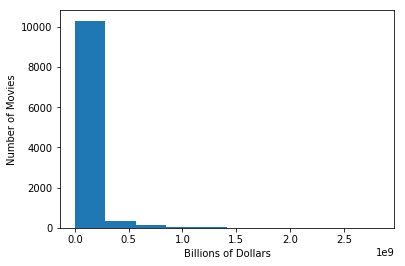

In [15]:
df.revenue_adj.plot(kind='hist', )
plt.xlabel('Billions of Dollars')
plt.ylabel('Number of Movies')

As depicted in the above histogram, the vast majority of movies do not make over even half a billion (500 million) dollars. To further dive into the variable, let's take a look at movies that make over one billion dollars:

#### What types of movies make BILLIONS of dollars?

In [16]:
over_billion_movies = df.loc[df['revenue_adj'] >= 1000000000][['original_title', 'revenue_adj']].sort_values(
    ['revenue_adj'], ascending=False)

print('There are', str(len(over_billion_movies)), 'movies that make over 1 billion dollars! Those movies are (descending order): \n')
print(', '.join(list(over_billion_movies['original_title'])))

There are 44 movies that make over 1 billion dollars! Those movies are (descending order): 

Avatar, Star Wars, Titanic, The Exorcist, Jaws, Star Wars: The Force Awakens, E.T. the Extra-Terrestrial, The Net, One Hundred and One Dalmatians, The Avengers, The Empire Strikes Back, Jurassic World, Jurassic Park, Furious 7, The Jungle Book, The Lord of the Rings: The Return of the King, Avengers: Age of Ultron, Harry Potter and the Deathly Hallows: Part 2, The Godfather, Return of the Jedi, Star Wars: Episode I - The Phantom Menace, Harry Potter and the Philosopher's Stone, Frozen, The Lion King, Pirates of the Caribbean: Dead Man's Chest, Iron Man 3, Independence Day, The Sound of Music, The Lord of the Rings: The Two Towers, Close Encounters of the Third Kind, Transformers: Dark of the Moon, The Lord of the Rings: The Fellowship of the Ring, Minions, Toy Story 3, Harry Potter and the Chamber of Secrets, Shrek 2, Skyfall, The Dark Knight Rises, Alice in Wonderland, Finding Nemo, The Dark K

Looking at these films, these are all typical "Blockbusters" and it should be no surprise that these movies have made more than a billion dollars - they are classics! 

### Exploration of 1D Variable - Budget Adjusted

In order to successfully make our movie, our screenwriter is going to have to request a budget. It will be important for our team to know exactly how much money to ask for and what other films have had in the past!

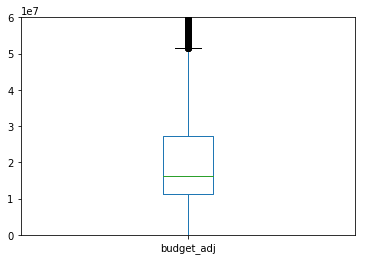

In [17]:
df['budget_adj'].plot(kind='box', ylim=(0,60000000))

The average movie seeks a budget of 15,000,000. However, let's see how many movies had a budget over 50,000,000 (our upper quartile) and in turn how much revenue they averaged!

### Comparing Budgets to Revenues

In [18]:
#Create a DF of movies that have an unusually high budget
above_average_budgets = df[df['budget_adj'] >= 50000000]

In [19]:
print('The above average budgeted movies typically had a budget around:', 
      str(int(above_average_budgets['budget_adj'].mean())), 'dollars')

The above average budgeted movies typically had a budget around: 94954673 dollars


In [20]:
print('The above average budgeted movies typically made around:', 
      str(int(above_average_budgets['revenue_adj'].mean())), 'dollars')
net_profit = above_average_budgets['revenue_adj'].mean() - above_average_budgets['budget_adj'].mean()

The above average budgeted movies typically made around: 253517320 dollars


In [21]:
print('Movies with an above average budget typically made', str(int(net_profit)), 'dollars in net profit!')

Movies with an above average budget typically made 158562647 dollars in net profit!


If we can acquire the budget, we stand to make a considerable profit!

### Exploration of 1D Variable - Runtime

While not one of our key research questions, it is important to be able to suggest to our screenwriter the length of movie they should write. After all, if our movie is too long or too short, it could impact its performance!

Text(0.5,0,'Runtime in Minutes')

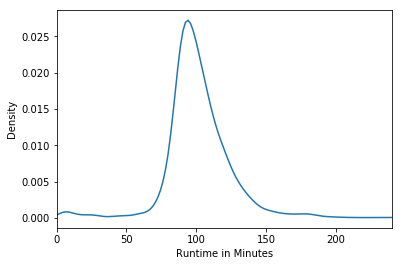

In [22]:
df['runtime'].plot(kind='kde', xlim=(0,240), x='Data')
plt.xlabel('Runtime in Minutes')

The runtime follows a normal distribution with the majority of movies having a runtime around 80-110 minutes. 95 minutes looks to be about the peak of our distribution. We should suggest to our screenwriter they keep their film around 95 minutes. This makes convention sense, most movies seem to be about an hour and a half.

### Research Question 1: What Genre of Movie Gets Produced the Most?

Create sub-dataframe that will hold only columns of genres occuring since 1996

In [23]:
vis_data = df.groupby('release_year').sum()[genre_cols]
vis_data = vis_data.loc[vis_data.index > 1995, :]

Create heatmap based on visualization dataframe created above:

[Text(201.5,0.5,'Year'), Text(0.5,111.453,'Genre')]

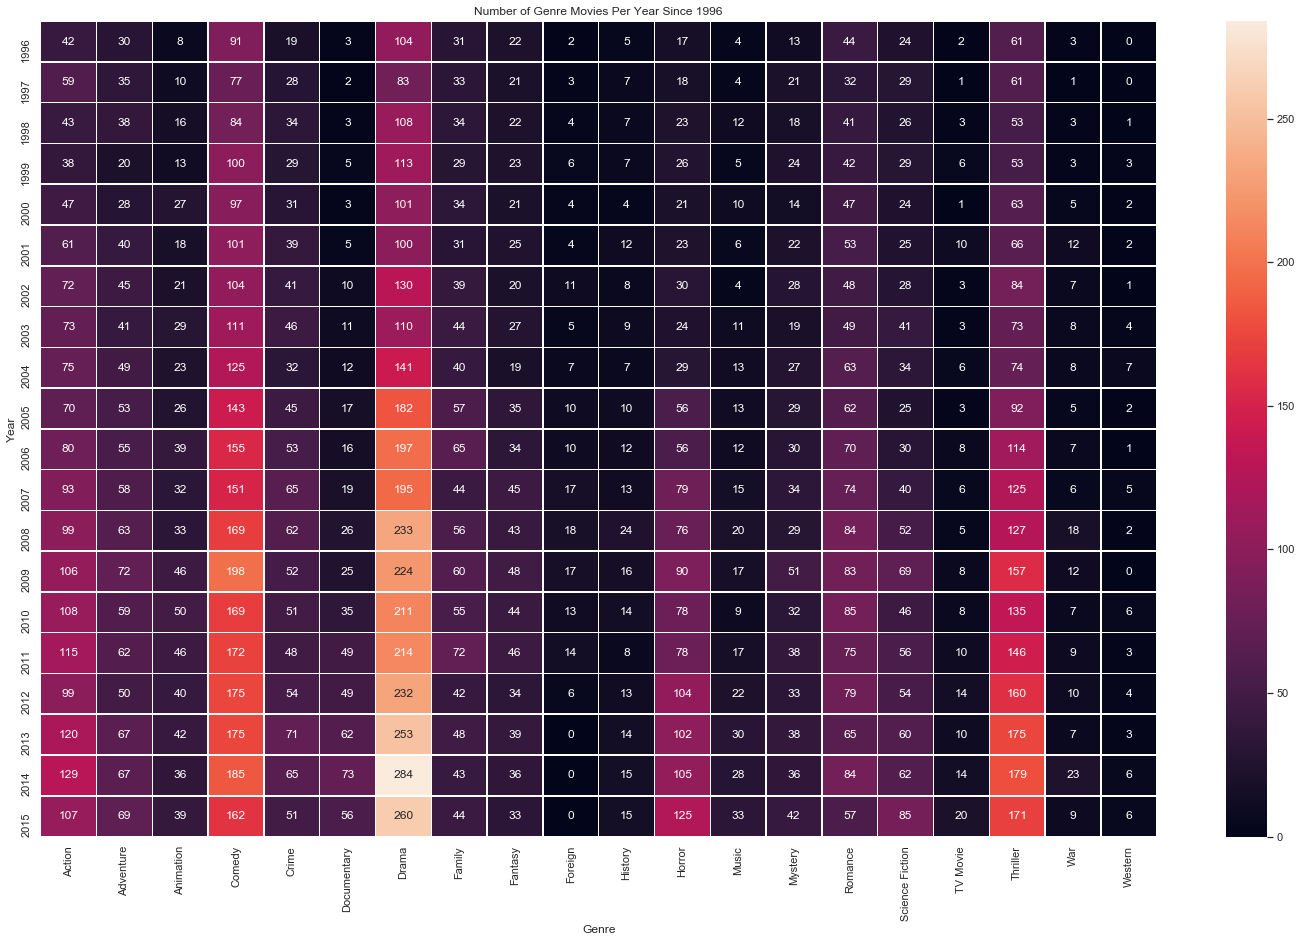

In [24]:
sns.set()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(25, 15))
g = sns.heatmap(vis_data, annot=True, fmt="d", linewidths=.5, ax=ax)
g.set(title = 'Number of Genre Movies Per Year Since 1996')
g.set(xlabel='Genre', ylabel='Year')

The above visualization shows three very clear genres that rise against others: Comedy, Drama, Thriller. Movies to stay away from are Foreign/History/War.

### Create Regression/Line Plots
Function to create regression/line subplots and label axis based on column from DF sent to function

In [25]:
def create_genre_plots(col, adjusted_y='10s of Billions of Dollars'):
    query_string = col + ' == 1'
    movie_data = df.query(query_string)[['release_year','revenue_adj']].groupby('release_year').sum()
    movie_data = movie_data.reset_index()
    fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
    g = sns.regplot(x="release_year", y="revenue_adj",  data=movie_data, ax=axs[0])
    g.set(xlabel='Year', ylabel=adjusted_y)
    g.set(title = col + ' - Regression Scatter Plot')
    gt = sns.lineplot(x="release_year", y="revenue_adj",  data=movie_data, ax=axs[1])
    gt.set(xlabel='Year', ylabel=adjusted_y)
    gt.set(title = col + ' - Line Plot')
    plt.suptitle(col + ' Visualization Data')

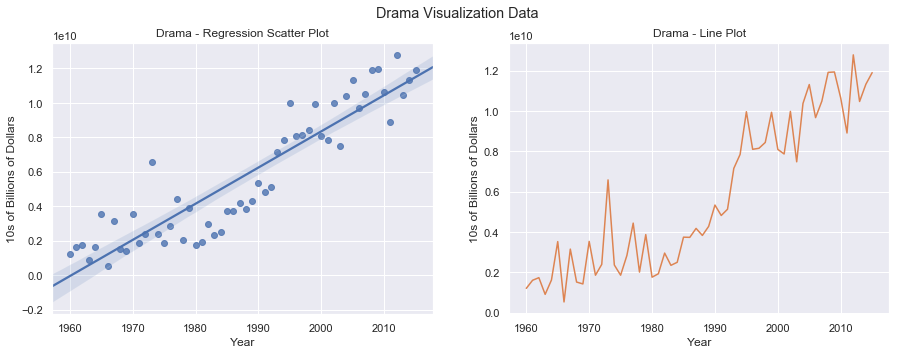

In [26]:
create_genre_plots('Drama')

The Drama genre is one of the highest performing genres. While there are a few years in the 2000's that dipped lower than other years, the genre still performs very well and the Regression plot shows an upwards trend.

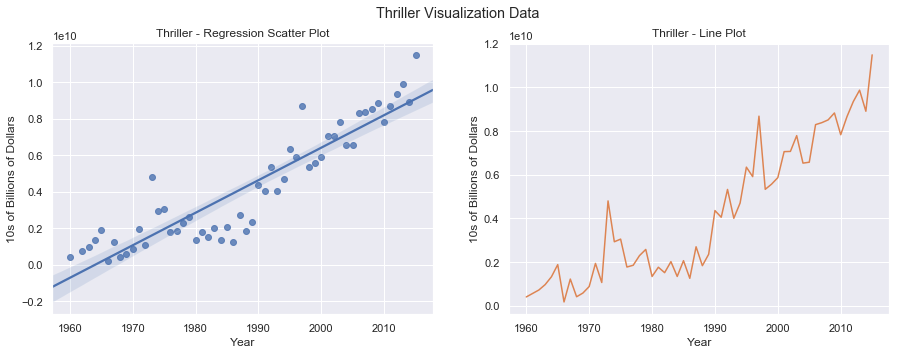

In [27]:
create_genre_plots('Thriller')

The thriller genre is also a high performing genre, however, since the 2000's the genre doesn't seem "AS" stable as the Drama genre.

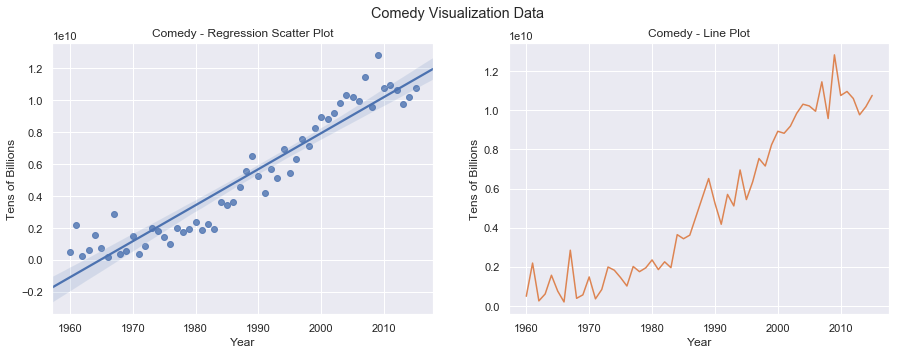

In [28]:
create_genre_plots('Comedy', adjusted_y='Tens of Billions')

The comedy genre appears to be the best suited for future growth and has had some of the highest performing years compared to other genres. The mid 90's appear to be a huge boom in comedy.

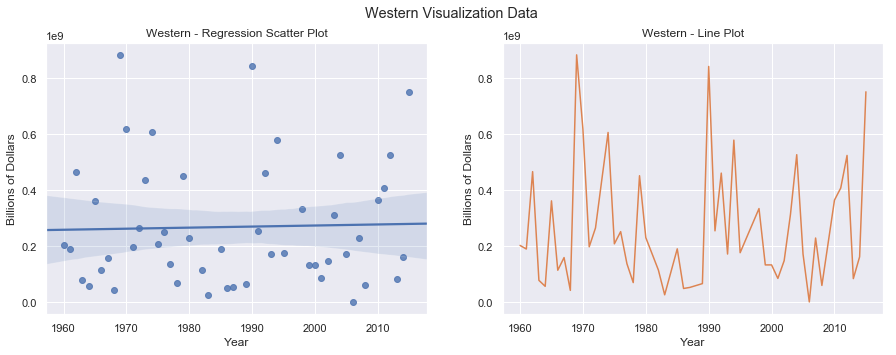

In [29]:
create_genre_plots('Western', adjusted_y='Billions of Dollars')

This visualization included to shown a potential genre to stay away from. Western films have their periodic blockbusters, but overwhelmingly they do not do well in the box office.

### Research Question 2: What, If Any, Features Impact the Revenue a Movie Will Make?

There are no **STRONG** relationships between any of the genres and revenue (revenue_adj). Based on the below correlation matrix, it would appear that a good indicator factor that influences revenue is the budget. As the budget increases, so too does the revenue. The popularity of the movie and the number of votes for the movie also strongly influences the revenue of the movie. This makes sense from a practical standpoint, after all, the more popular a movie is the more people that will see it (earning the film more revenue) 

In [30]:
df.corr()

id  popularity    budget   revenue   runtime  \
id               1.000000   -0.012986 -0.140604 -0.098664 -0.075687   
popularity      -0.012986    1.000000  0.545205  0.663244  0.136222   
budget          -0.140604    0.545205  1.000000  0.734797  0.189601   
revenue         -0.098664    0.663244  0.734797  1.000000  0.162047   
runtime         -0.075687    0.136222  0.189601  0.162047  1.000000   
vote_count      -0.034709    0.800779  0.632544  0.791105  0.162481   
vote_average    -0.061468    0.211060  0.082210  0.173758  0.156878   
release_year     0.511222    0.090458  0.116616  0.057491 -0.112322   
budget_adj      -0.204396    0.480392  0.939378  0.693507  0.207058   
revenue_adj     -0.143467    0.576660  0.578070  0.899643  0.162118   
Action          -0.076193    0.148205  0.224928  0.149368  0.046001   
Adventure       -0.073087    0.200794  0.293414  0.247990  0.049297   
Animation        0.006790    0.053847  0.072517  0.079536 -0.291035   
Comedy          -0.098170   -0.040330 -0.032392 -0.015040 -0.128889   
Crime           -0.074423    0.036646  0.036716  0.007748  0.055692   
Documentary      0.148038   -0.104440 -0.102120 -0.072552  0.006907   
Drama           -0.044426   -0.049640 -0.079447 -0.080826  0.236672   
Family          -0.059625    0.049707  0.100729  0.099447 -0.147200   
Fantasy         -0.063512    0.105240  0.176954  0.146804 -0.014632   
Foreign         -0.047649   -0.060556 -0.056750 -0.043577  0.022991   
History         -0.025694   -0.012796  0.022634 -0.012066  0.195519   
Horror           0.044792   -0.076861 -0.115071 -0.083240 -0.103021   
Music            0.023911   -0.031456 -0.033233 -0.019049  0.027660   
Mystery         -0.031197    0.011992  0.013335  0.000680  0.034483   
Romance         -0.072956   -0.024095 -0.029904 -0.015699  0.068432   
Science Fiction -0.021903    0.127193  0.120116  0.092752 -0.031281   
TV Movie         0.070625   -0.047096 -0.058220 -0.042386 -0.035034   
Thriller        -0.024304    0.056708  0.049802  0.009188  0.017088   
War             -0.019881    0.012759  0.032154  0.010464  0.130715   
Western         -0.030643   -0.007099  0.017306 -0.012068  0.061097   
profit          -0.110169    0.530097  0.414280  0.841313  0.130608   

                 vote_count  vote_average  release_year  budget_adj  \
id                -0.034709     -0.061468      0.511222   -0.204396   
popularity         0.800779      0.211060      0.090458    0.480392   
budget             0.632544      0.082210      0.116616    0.939378   
revenue            0.791105      0.173758      0.057491    0.693507   
runtime            0.162481      0.156878     -0.112322    0.207058   
vote_count         1.000000      0.255265      0.108466    0.564474   
vote_average       0.255265      1.000000     -0.120723    0.085171   
release_year       0.108466     -0.120723      1.000000    0.031924   
budget_adj         0.564474      0.085171      0.031924    1.000000   
revenue_adj        0.683392      0.180073     -0.105536    0.600129   
Action             0.161743     -0.106951     -0.052472    0.228323   
Adventure          0.203301     -0.014475     -0.059661    0.310037   
Animation          0.039036      0.120565      0.054679    0.091439   
Comedy            -0.052815     -0.053459     -0.028383   -0.021414   
Crime              0.039832      0.061131     -0.053401    0.020282   
Documentary       -0.071149      0.224410      0.122373   -0.086871   
Drama             -0.054300      0.181798     -0.026274   -0.077352   
Family             0.033886      0.008981     -0.015076    0.132834   
Fantasy            0.107426     -0.036688     -0.024633    0.187055   
Foreign           -0.046422      0.001183      0.000933   -0.032482   
History           -0.010580      0.083540     -0.053051    0.044528   
Horror            -0.071665     -0.287162     -0.006311   -0.140217   
Music             -0.031996      0.106231     -0.017528   -0.024733   
Mystery            0.009390     -0.007999     

### Research Question 3: Is One Genre More Profitable or Risky Than Another?

Two dataframes are created that contain movies that have lost more than 0 dollars (losses DF) and movies that have profitted more than 1,000,000 dollars. It is important to look at both losses and profits, especially if one of our target genres has far more losses or profits versus the other genres.

In [31]:
profits = df[df.index > 1995].query("profit >= 1000000")[genre_cols]
losses = df[df.index > 1995].query("profit < 0")[genre_cols]
profits = pd.DataFrame(profits.sum()).reset_index().rename(columns={'index':'genre', 0:'Num_Movies'})
losses = pd.DataFrame(losses.sum()).reset_index().rename(columns={'index':'genre', 0:'Num_Movies'})

> **Analysis Note:** Each dataframe is created, aggregated by genre, and given new column names

#### Visualization to Compare Profits/Losses

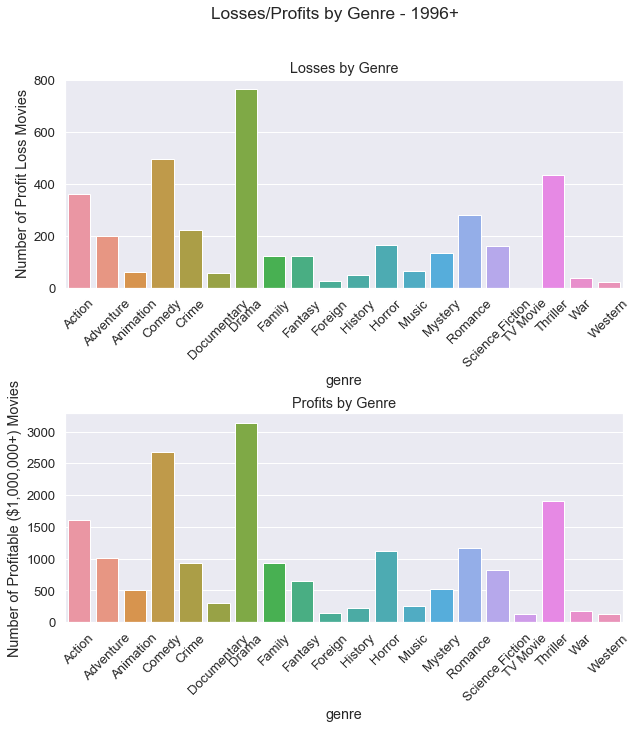

In [32]:
#Ensure font size is viewable
sns.set(font_scale = 1.2)
#Create two rows of one column each
fig, axs = plt.subplots(nrows=2, figsize=(10, 10))

#Losses graph
g = sns.barplot(x='genre', y='Num_Movies', data=losses, ax=axs[0])
g.set(ylabel='Number of Profit Loss Movies')
g.set(title = 'Losses by Genre')

#profits graph
gr = sns.barplot(x='genre', y='Num_Movies', data=profits, ax=axs[1])
gr.set(ylabel='Number of Profitable ($1,000,000+) Movies')
gr.set(title = 'Profits by Genre')

#Tilt axis ticks for each figure
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
plt.suptitle('Losses/Profits by Genre - 1996+')
#Add space between two plots
plt.subplots_adjust(hspace = 0.6)

It can be seen that large profits and losses tend to occur in the same categories (Comedy, Drama, and Thriller). These also are the same genres of movies that have the highest amount of movies made. It is likely that people like these movie genres the most and because of this, these genres are written the most. This data indicates that a comedy movie still has better profitability than dramas/thrillers.

<a id='conclusions'></a>
## Conclusions

Based on the analysis above, one winner emerges from the highest performing/earning genres: Comedy. The comedy genre has seen a steady increase since the mid 1980s. While the genre is clearly a popular one and one of the highest revenue earning, more important is making a movie that is popular and has a high budget as these features are often correlated with higher revenue.

In our data exploration we determined that our movie should be about 80-110 minutes long. If we are able to acquire a higher budget, we may be able to make a nice net profit based on historical data. We should also provide the list of movies that made more than a billion dollars of revenue as an ispiration to our screenwriter (perhaps in their craft they can glean a pattern/trend from the movies that the data cannot).

While the Comedy genre looks promising, the main takeaway from this analysis is that while Comedies/Dramas/Thrillers are the most produced movies; they are also the movies with the largest losses. Having a marketing/PR team would prove to be almost as important as choosing the right genre!

#### Limitations:
* Incompleteness of data
   * Because the revenue/budget data was paramount to our analysis, over half of the data was imputed on the mean of the remaining data by year. This may result in an incomplete picture of what revenues were actually like. Fortunately because this is to model movie revenues, it should be suitable for our purposes.
   
   
* Dataset ends in 2015
    * Just recently, Avengers: Endgame toppled the charts and is racing to beat Avatar for the highest grossing film of all time. Because our dataset ends in 2015, other films such as Avengers: Endgame are not in our dataset and may not capture trends from the last 5 years.
    
    
* Markets change
    * Although the data we have is somewhat dated, even if we had up to date data - the market trends could suddenly shift. For example, if we decide to make our comedy movie and all of a sudden the market favors against comedies, we could see results that do not match the patterns in our analysis.
    
    
* The craft is an art
    * Because the content of our analysis is largely subjective and artistic, all the data/analysis in the world could provide to be unfruitful. Our movie may be entered into the market right after a blockbuster movie and the limelight is taken from ours. This is where we will lean on our screenwriter for domain knowledge.
    
##### Future Analysis:
- Do certain words in the title impact the profits/revenue of a movie?
- Do certain production studios have consistently higher revenues/losses? (i.e. should a screenwriter seek to work for these?)
- Do blended genres (i.e. Romantic Comedies) have higher revenues than just solo genres?

<a id='references'></a>
## References

[Proper Utilization of Multilabel Binarizer](https://chrisalbon.com/machine_learning/preprocessing_structured_data/one-hot_encode_features_with_multiple_labels/)

[Pandas API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

[Seaborn Visualization API](https://seaborn.pydata.org/api.html)